# Arxiv Dataset Clustering
This notebook aims to cluster scholarly articles from the Arxiv dataset.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preview Data

In [3]:
input_file = '../data/data_concatenated.csv'
df = pd.read_csv(input_file)
df.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_25320\1699114039.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


,id,title,abstract,categories,update_date,concat
0,id,title,abstract,categories,update_date,title abstract
1,705.0462,resource modality game semantics,description resource game semantics never achi...,math.CT cs.CL,2007-05-23,resource modality game semantics description r...
2,704.204,bishop surface vanishing bishop invariant,derive complete set invariant formal bishop su...,math.CV math.DG,2007-05-23,bishop surface vanishing bishop invariant deri...
3,704.1128,subfactors hadamard matrix,complex hadamard matrix h one associate spin m...,math.OA,2007-05-23,subfactors hadamard matrix complex hadamard ma...
4,704.1127,sensitivity solar offlimb line profile electro...,effect electron density stratification intensi...,astro-ph,2007-05-23,sensitivity solar offlimb line profile electro...


## Text Vectorization

In [4]:
def vectorize_text(df):
    # Replace NaN values in the 'concat' column with empty strings
    df['concat'] = df['concat'].fillna('')
    # Instantiate TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['concat'])
    return X, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)

## Dimensionality Reduction

In [5]:
def reduce_dimensionality(X):
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X)
    return X_reduced

X_reduced = reduce_dimensionality(tfidf_matrix)

## Determine Optimal Clusters

d:\ML-Unsupervised\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\ML-Unsupervised\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


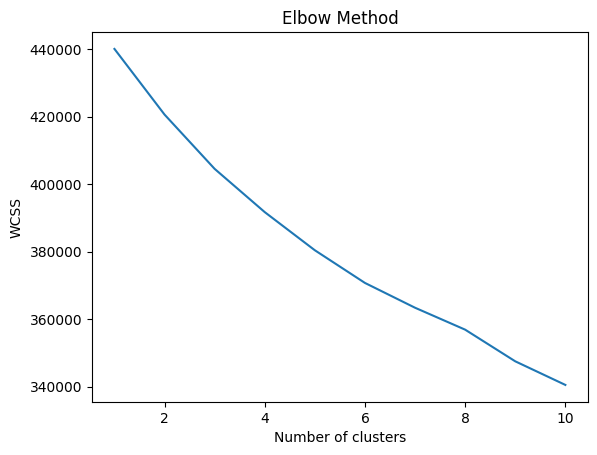

In [6]:
def determine_optimal_clusters(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

determine_optimal_clusters(X_reduced)

In [ ]:
def determine_optimal_clusters(X_reduced):
    wcss = []
    silhouette_scores = []
    davies_bouldin_scores = []

    # Define a range of clusters to test
    cluster_range = range(2, 11)

    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_reduced)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

        # Calculate Davies-Bouldin index
        davies_bouldin_avg = davies_bouldin_score(X_reduced, kmeans.labels_)
        davies_bouldin_scores.append(davies_bouldin_avg)

    # Plot the elbow method
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    # Plot Silhouette Score
    plt.subplot(1, 3, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    # Plot Davies-Bouldin Score
    plt.subplot(1, 3, 3)
    plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-', color='r')
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

# Call the function to determine optimal clusters
determine_optimal_clusters(X_reduced)

## Apply Clustering

In [9]:
def apply_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(X)
    return clusters

# Based on the Elbow Method plot, choose an optimal number for clusters
optimal_clusters = 5  # This is just an example. Adjust based on your observation.
df['cluster'] = apply_clustering(X_reduced, optimal_clusters)

## Evaluation

In [10]:
def evaluate_clustering(X, labels):
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score}")

evaluate_clustering(X_reduced, df['cluster'])

KeyboardInterrupt: 

## Visualizing Clusters

In [ ]:
def plot_clusters(df):
    sns.countplot(df['cluster'])
    plt.title('Distribution of Clusters')
    plt.show()

plot_clusters(df)

## Save Results

In [ ]:
output_file = '../data/data_clusteref.csv'
df.to_csv(output_file, index=False)
